# Trabajo Práctico Semanal Nº15
Teoria de circuitos 2

### Sandomir Laham Uriel

Diseñe el cuadripolo A para que se comporte como:
* Filtro pasa bajos Chebyshev de 4to. orden, 1dB de ripple. 
* No disipativo.
* Normalizado en frecuencia e impedancia.
<img src="https://i.gyazo.com/4796a1755b93524a443f8dff05a10667.png"/>

### Diseño del cuadripolo

Para el diseño del cuadripolo, sabemos que el parametro $S_{21}$ corresponde a la transferencia directa, la cual debera coincidir con la funcion transferencia de un filtro Chebyshev Pasa-Bajos de orden 4 con 1dB de ripple:

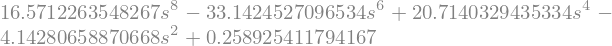

In [8]:
import numpy as np
import scipy.signal as sig
import splane as tc2
import matplotlib.pyplot as plt
from sympy import * 

init_printing(use_unicode = True)
s = symbols('s', relational= True)

alpha_max = 1 #dB

### Epsilon para 1dB:
ee = 10**(alpha_max/10) - 1

### Polinomio de Chebyshev:
C0 = 1
C1 = s
C2 = 2*s*C1 - C0
C3 = 2*s*C2 - C1
C4 = 2*s*C3 - C2

expand(ee*C4**2)

<BR><BR>Para la sintesis del cuadripolo, necesitamos obtener el parametro $S_{11}$ sabiendo $|S_{11}|^2 = 1 - |S_{21}|^2$

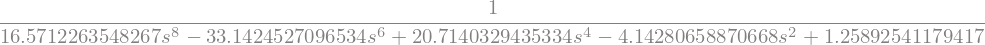

In [27]:
### Armo el polinomio:
S21_2 = 1/(1 + 16.5712263548267*s**8 - 33.1424527096534*s**6 + 20.7140329435334*s**4 - 4.14280658870668*s**2 + 0.258925411794167)
simplify(S21_2)

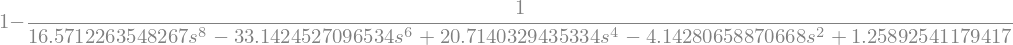

In [10]:
S11_2 = 1 - S21_2
simplify(S11_2)

<br><br>
Buscamos los ceros y polos en el semiplano izquierdo de S11:

In [28]:
### Calculamos los ceros y polos

num = np.roots([16.5712263548267, 0 , 33.1424527096534, 0, 20.7140329435334, 0, 4.14280658870668, 0, 0.25892541179417])
den = np.roots([16.5712263548267, 0 , 33.1424527096534, 0, 20.7140329435334, 0, 4.14280658870668, 0, 1.25892541179417])
num, den

(array([-2.98555891e-08+0.92387953j, -2.98555891e-08-0.92387953j,
         2.98555890e-08+0.92387953j,  2.98555890e-08-0.92387953j,
        -2.33827175e-08+0.38268343j, -2.33827175e-08-0.38268343j,
         2.33827174e-08+0.38268343j,  2.33827174e-08-0.38268343j]),
 array([-0.139536  +0.98337916j, -0.139536  -0.98337916j,
         0.139536  +0.98337916j,  0.139536  -0.98337916j,
        -0.33686969+0.40732899j, -0.33686969-0.40732899j,
         0.33686969+0.40732899j,  0.33686969-0.40732899j]))

In [30]:
### Descartamos los que tienen parte real positiva:

zeros = np.array([-2.98555891e-08+0.92387953j, -2.98555891e-08-0.92387953j, -2.33827175e-08+0.38268343j, -2.33827175e-08-0.38268343j])
poles = np.array([-0.139536  +0.98337916j, -0.139536  -0.98337916j, -0.33686969+0.40732899j, -0.33686969-0.40732899j])

num_cheb, den_cheb = sig.zpk2tf(zeros, poles, 1)
num_cheb, den_cheb

(array([1.00000000e+00, 1.06476613e-07, 9.99999994e-01, 4.86612949e-08,
        1.24999998e-01]),
 array([1.        , 0.95281138, 1.45392476, 0.74261936, 0.27562758]))

<br><br>
Despreciando los terminos de mucho menor orden tenemos:

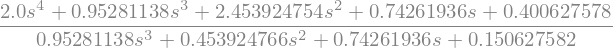

In [31]:
S11 = (s**4+s**2*9.99999994e-01+1.24999998e-01)/(s**4+s**3*0.95281138+s**2*1.45392476+s*0.74261936+0.27562758)
Z1 = (1 + S11)/(1 - S11)
simplify(Z1)

<br><br>
Obtenemos los valores de los componentes mediante remociones por el metodo Cauer:
<br>
<img src="https://i.gyazo.com/bab86cc7981b38e34b6be8faee68954b.png"/>

<br><br>
### Simulacion circuital

<img src="https://i.gyazo.com/8fb6bf2562685c574b08bad4c8b6b0ce.png"/>

Viendo el parametro S11 podemos observar que el cuadripolo no esta completamente adaptado sino que la relacion entre onda incidente y reflejada varia segun la frecuencia.
<br>
* Se observa en la banda de paso, que el parametro tiene 2 ceros donde la transferencia es maxima y la reflexion nula. En el resto de frecuencias del ancho de banda del filtro, S21 varia entre 0 y 0.45, es decir, existe cierta onda reflejada.
<br>
* En la zona de transicion, el parametro en estudio aumenta considerablemente hasta llegar al valor unitario durante toda la banda de rechazo donde el cuadripolo es encuentra completamente desadaptado.
<br>
* Ademas, se puede observar que en la frecuencia de corte del filtro, las graficas coinciden en modulo, lo cual tiene sentido ya que es el punto para el cual se transmite la mitad de la potencia a la carga, y se refleja la otra mitad. En dicha frecuencia de corte, todos los parametros S coinciden en modulo puesto a que los fenomenos que representan, apuntan a que se transmite y se refleja potencia en iguales partes en ambos sentidos.

### Desnormalizacion

Utilizamos $\Omega_Z = 50\Omega$ ,  $\Omega_\omega = 2\pi $MHz:
<br><br>
$L_1 = 2.099\frac{1}{\Omega_\omega}.\Omega_Z = 0.0167mHy$
<br><br>
$L_2 = 2.8231\frac{1}{\Omega_\omega}.\Omega_Z = 0.02253mHy$
<br><br>
$C_1 = 1.064\frac{1}{\Omega_\omega}\frac{1}{\Omega_Z} = 3.387nF$
<br><br>
$C_2 = 2.099\frac{1}{\Omega_\omega}\frac{1}{\Omega_Z} = 2.512nF$
<br><br>
$R_1 = 2.66 . \Omega_Z = 133\Omega$

<img src="https://i.gyazo.com/c2be57316f11dfbe38cb7d7753dfd0bd.png"/>